In [1]:
import pandas as pd
import numpy as np
from utils.ModelingUtils import make_dummies, make_ml_target
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
data = pd.read_parquet('../data/prepared_data.parquet')

data = make_ml_target(data)
data = make_dummies(data, 'near_city_station_name', 'near_city')

In [3]:
y = data['ML_TARGET'].values
X = data.iloc[:, 9:].drop('ML_TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
model = CatBoostClassifier()
model.load_model('models/first_model')

In [6]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [8]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    193326
           1       0.70      0.23      0.35     26277
           2       0.69      0.28      0.40      6840
           3       0.82      0.32      0.46      1199

    accuracy                           0.88    227642
   macro avg       0.77      0.46      0.54    227642
weighted avg       0.86      0.88      0.85    227642


0.9327520129876058

In [17]:
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

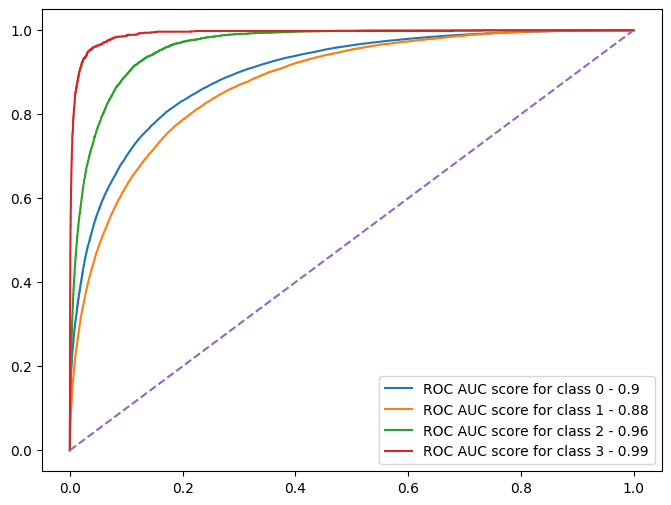

In [27]:
plt.figure(figsize=(8, 6))

for i in range(4):
    plt.plot(fpr[i], tpr[i], label = f'ROC AUC score for class {i} - {round(roc_auc_score(y_test_bin[:, i], y_prob[:, i]),2)}')

random_model = np.linspace(0,1,10)
plt.plot(random_model, random_model, linestyle='dashed')
plt.legend()
plt.show()

In [29]:
(0.9+0.88+0.96+0.99)/4

0.9325000000000001